# **Cross-Validation**

Imagine we take 20% of the data as a validation set to test our model. While the model might perform well on this particular set, its accuracy could vary when tested on a different subset of the data. This change in performance highlights the need for cross-validation.

In cross-validation, we run our modeling process on different subsets of the data to get multiple measures of model quality.

When to use Cross Validation?

-> For small datasets, where extra computational burden isn't an issue, we can use cross validation.

-> For larger datasets, a single validation set is sufficient. You may have enough data that there's little need to re-use some of it for holdout(validation).

**Selecting Target & Features**

In [ ]:
import pandas as pd

data = pd.read_csv('/content/melb_data.csv')

#target
y = data.Price

#features
features = ['Rooms','Distance','Landsize','BuildingArea','YearBuilt']
X = data[features]

**Creating Pipeline for Preprocessing & Modeling**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[('preprocessing',SimpleImputer(strategy='mean')),
                              ('model',RandomForestRegressor(n_estimators=50,random_state=0))])


**Evaluating Model**

Here we are dividing the data into 5 pieces, each 20% of the full dataset means we have dividedd the whole data into 5 folds.

We use the first fold as validation set and use the rest as training set. We repeat this process until each of the 5 folds are used as validation set.

In [ ]:
from sklearn.model_selection import cross_val_score

score = -1 * cross_val_score(my_pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')
#cv : number of folds(subsets of data)
#scoring : score function used to evaluate the model
#instead of neg_mean_absolute_error we can also use other function like mean squared error or root mean squared error


print("MAE scores for each fold (subset of data) : \n",score)

print("\nAverage MAE Score : ",score.mean())

MAE scores for each fold (subset of data) : 
 [301628.7893587  303164.4782723  287298.331666   236061.84754543
 260383.45111427]

Average MAE Score :  277707.3795913405


**Evaluating MAE for Different no. of trees in Random Forest**

In [ ]:
def score(n_estimators):
  pipeline = Pipeline(steps=[('preprocessor',SimpleImputer(strategy='mean')),('model',RandomForestRegressor(n_estimators,random_state=0))])

  mae = -1*cross_val_score(pipeline,X,y,cv=3,scoring='neg_mean_absolute_error')
  return mae.mean()

In [ ]:
trees = [50,100,150,200,250,300,350,400]

result={}

for i in trees:
  result[i] = score(i)

for key,value in result.items():
  print(f"Trees = {key} \t MAE : {value}")

Trees = 50 	 MAE : 294846.1550120387
Trees = 100 	 MAE : 294378.84361591726
Trees = 150 	 MAE : 294112.9943328616
Trees = 200 	 MAE : 293858.58135938307
Trees = 250 	 MAE : 293693.9694143582
Trees = 300 	 MAE : 293481.32195318816
Trees = 350 	 MAE : 293344.88662699756
Trees = 400 	 MAE : 293217.8708162901


For 400 trees 293217.8708162901 is the minimum avg mae.



Text(0.5, 1.0, 'Avg MAE for different no. of trees')

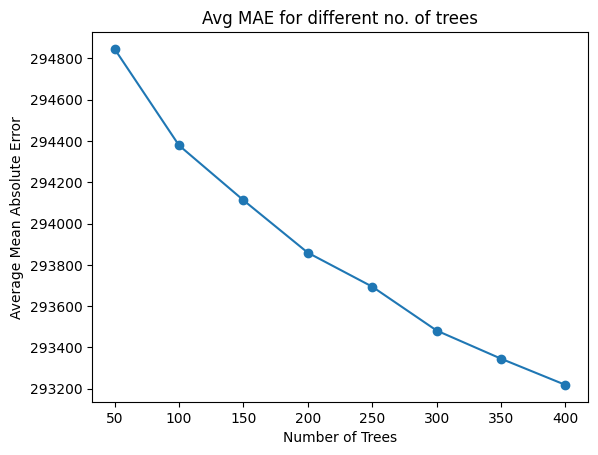

In [ ]:
import matplotlib.pyplot as plt

min_mae = min(result,key=result.get)
print(f"For {min_mae} trees {result[min_mae]} is the minimum avg mae.\n")

tree = list(result.keys())
mae = list(result.values())

plt.plot(tree,mae)
plt.scatter(tree,mae)
plt.xlabel('Number of Trees')
plt.ylabel('Average Mean Absolute Error')
plt.title('Avg MAE for different no. of trees')